In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [4]:
x = torch.tensor(2.1, requires_grad=True)
loss = x ** 2
loss.backward()

In [5]:
print(x.grad)

tensor(4.2000)


In [61]:
x_data = torch.linspace(-5, 5, 500)
nu, sigma = torch.tensor(0.2), torch.tensor(0.2)
noise = torch.tensor([torch.normal(nu, sigma ) for _ in range(len(x_data))]) 
y_data = torch.sin(x_data) + noise

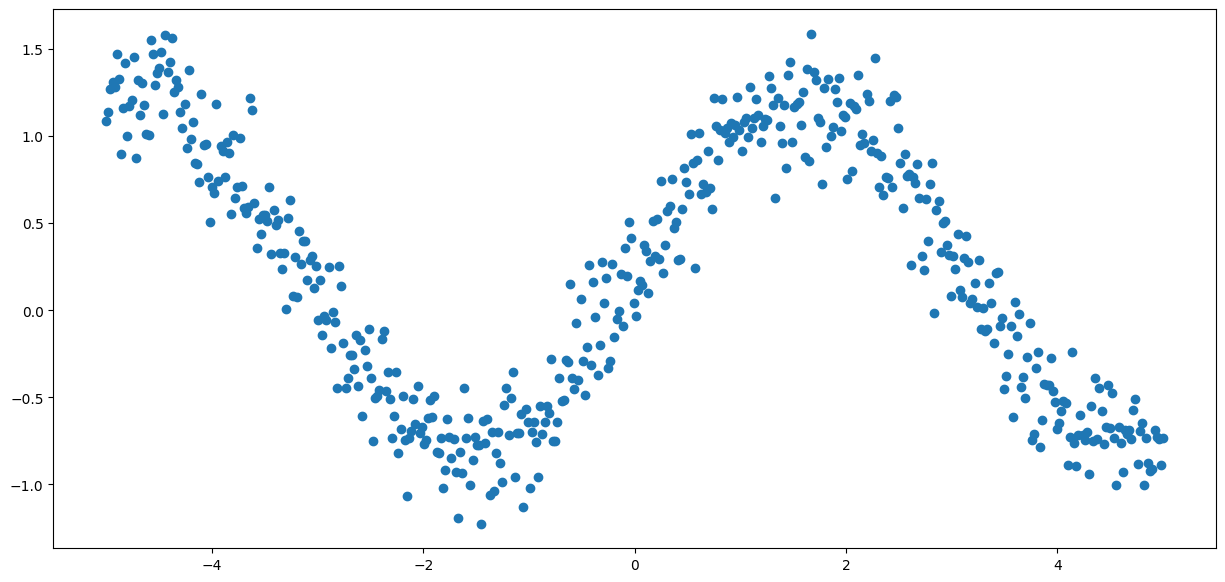

In [17]:
plt.figure(figsize=(15, 7))
plt.scatter(x_data, y_data)

NN

In [143]:
import torch.nn as nn
import torch.nn.functional as F
class NN(nn.Module):
    def __init__(self):
        super(NN, self). __init__()
        
        self.linear1 = nn.Linear(1, 5)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(5, 1)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x
    
    def training_step(self, x, yt):
        x, yt = x.reshape(500, 1), yt.reshape(500, 1)
        yp = self.forward(x)
        loss = torch.mean((yt - yp) ** 2)
        return loss
    

In [144]:
model = NN()

In [145]:
def train(epochs, model, x_data, y_data, lr, opt_f=torch.optim.SGD):
    opt = opt_f(model.parameters(), lr=lr)
    for epoch in range(epochs):
        loss = model.training_step(x_data, y_data)
        loss.backward()
        opt.step()
        opt.zero_grad()
        # if epoch % 100 == 0:
        #     print(f'{epoch=}, loss={loss.item()}')
    print(loss.item())

In [146]:
epochs = 10001
lr = 0.1

train(epochs, model, x_data.reshape(500,1), y_data.reshape(500, 1), lr)

0.07490640133619308


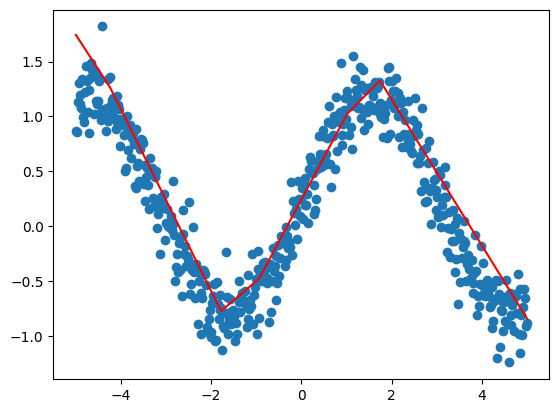

In [147]:
y_pred = model(x_data.reshape(500,1))
plt.scatter(x_data.numpy(), y_data.numpy())
plt.plot(x_data.numpy(), y_pred.detach().numpy(), 'r')